## Importing libraries

In [1]:
import os
import cv2
import time
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

## Importing the Dataset

In [2]:
# List of subfolders
subfolders = ["beyza", "zeynep", "ezgi"]

# Set the path to the root directory
root_path = r"C:\Users\Beyza\Desktop\project"  # the root directory where the images are stored

images = []
labels = []

valid_extensions = {".jpg", ".jpeg", ".png"}

for subfolder in subfolders:
    subfolder_path = os.path.join(root_path, subfolder)

    for folder_name in os.listdir(subfolder_path):
        folder_path = os.path.join(subfolder_path, folder_name)
        if os.path.isdir(folder_path):
            for file_name in os.listdir(folder_path):
                if any(file_name.lower().endswith(ext) for ext in valid_extensions):
                    image_path = os.path.join(folder_path, file_name)
                    label = file_name.split('_')[0]
                    # Extract only the part before the decimal point
                    label = label.split('.')[0]
                    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)                    
                    if img is None:
                        print(f"Failed to load image: {image_path}")
                    else:
                        img = cv2.resize(img, (64, 64))
                        img = np.expand_dims(img, axis=-1)
                        images.append(img)
                        labels.append(label)

## Preprocessing

In [3]:
images = np.array(images)
labels = np.array(labels)

label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

images = images / 255.0

## Splitting the Dataset

In [4]:
X_train, X_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)

##  Fitting the Model

In [5]:
# Define the CNN model with glorot_uniform initializer
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

C:\Users\Beyza\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
# Define the optimizer with a custom learning rate (e.g., 0.001)
custom_learning_rate = 0.001
custom_optimizer = Adam(learning_rate=custom_learning_rate)

In [7]:
# Create an image data generator
datagen = ImageDataGenerator(rescale=1./255)

In [8]:
# Compile the model with the custom optimizer
model.compile(optimizer=custom_optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Create a generator for training data
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# Create a generator for validation data
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

In [10]:
# Record the start time before compilation
start_time = time.time()

In [11]:
# Train the model
history_2 = model.fit(X_train,y_train, epochs=40, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 41s 134ms/step - accuracy: 0.0395 - loss: 3.8960 - val_accuracy: 0.1423 - val_loss: 3.2565
Epoch 2/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 31s 117ms/step - accuracy: 0.1650 - loss: 3.1321 - val_accuracy: 0.1784 - val_loss: 3.1438
Epoch 3/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 33s 124ms/step - accuracy: 0.2237 - loss: 2.8346 - val_accuracy: 0.2278 - val_loss: 2.8373
Epoch 4/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 34s 129ms/step - accuracy: 0.2725 - loss: 2.6310 - val_accuracy: 0.2466 - val_loss: 2.7492
Epoch 5/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 36s 138ms/step - accuracy: 0.3269 - loss: 2.4127 - val_accuracy: 0.2602 - val_loss: 2.6998
Epoch 6/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 33s 125ms/step - accuracy: 0.3981 - loss: 2.1598 - val_accuracy: 0.3770 - val_loss: 2.1991
Epoch 7/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 34s 127ms/step - accuracy: 0.4555 - loss: 1.9063 - val_accuracy: 0.3961 - val_loss: 2.1399
Epoch 8/40
264/264 ━━━━━━━━━━━━━━━━━━━━ 31s 117ms/step - accuracy: 0.4756 - loss: 1

In [12]:
# Record the end time after compilation
end_time = time.time()

# Calculate and print the compilation time
compilation_time = end_time - start_time
print(f"Model compilation time: {compilation_time} seconds")

Model compilation time: 1480.3983221054077 seconds


## Results

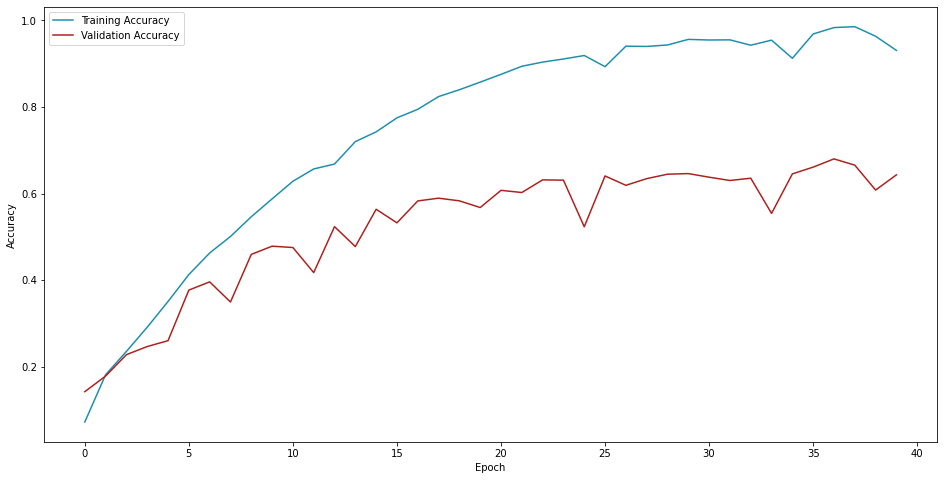

In [13]:
# Plot accuracy and validation accuracy graphs
plt.figure(figsize=(16, 8))
plt.plot(history_2.history['accuracy'], label='Training Accuracy',color="#1D8FAD")
plt.plot(history_2.history['val_accuracy'], label='Validation Accuracy',color="#AD211D")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [14]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.4f}, Test accuracy: {accuracy * 100:.2f}%')

132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.6402 - loss: 2.0277
Test loss: 1.9851, Test accuracy: 64.34%


## Plotting 10 True Samples

132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step


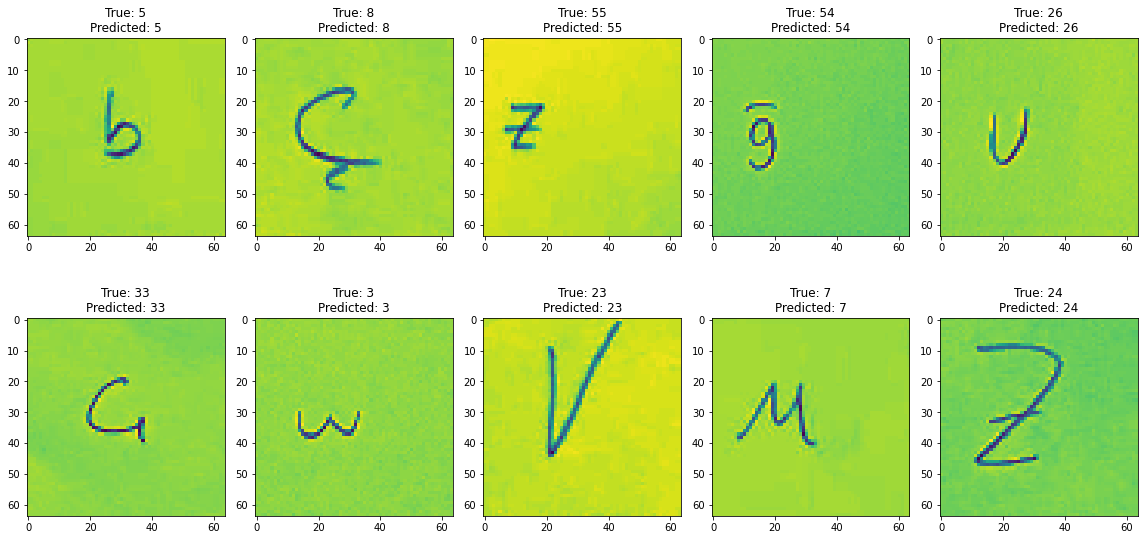

In [15]:
# Use the trained model to predict classes on the test set
predictions = model.predict(X_test)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode the encoded labels back to the original labels
decoded_predicted_labels = label_encoder.inverse_transform(predicted_labels)
decoded_true_labels = label_encoder.inverse_transform(y_test)

# Display 10 true predicted images in a subplot 
num_wrong_images_to_display = 10
num_columns = 5
num_rows = 2
count = 0

plt.figure(figsize=(16, 8))  

for i in range(len(X_test)):
    if decoded_true_labels[i] == decoded_predicted_labels[i]:
        plt.subplot(num_rows, num_columns, count + 1)
        plt.imshow(X_test[i])
        plt.title(f"True: {decoded_true_labels[i]}\nPredicted: {decoded_predicted_labels[i]}")
        count += 1

        if count == num_wrong_images_to_display:
            break

plt.tight_layout()
plt.show()


## Plotting 10 False Samples

132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step


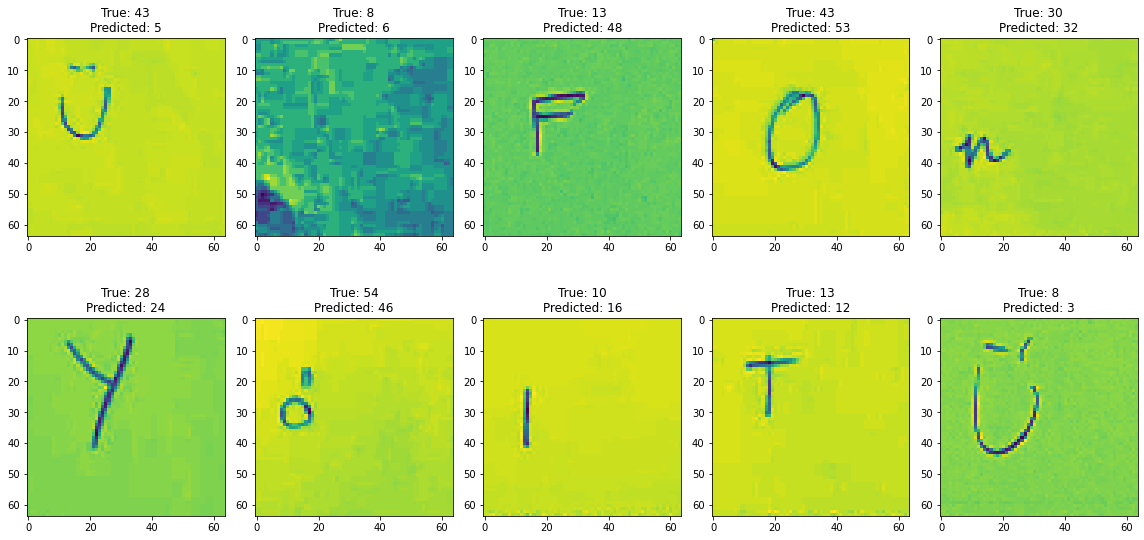

In [16]:
# Use the trained model to predict classes on the test set
predictions = model.predict(X_test)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode the encoded labels back to the original labels
decoded_predicted_labels = label_encoder.inverse_transform(predicted_labels)
decoded_true_labels = label_encoder.inverse_transform(y_test)

# Display 10 wrong predicted images in a subplot
num_wrong_images_to_display = 10
num_columns = 5
num_rows = 2
count = 0

plt.figure(figsize=(16, 8))  

for i in range(len(X_test)):
    if decoded_true_labels[i] != decoded_predicted_labels[i]:
        plt.subplot(num_rows, num_columns, count + 1)
        plt.imshow(X_test[i])
        plt.title(f"True: {decoded_true_labels[i]}\nPredicted: {decoded_predicted_labels[i]}")
        count += 1

        if count == num_wrong_images_to_display:
            break

plt.tight_layout()
plt.show()


In [ ]:
# Save the trained model
model.save('person_recognition_model.h5')

In [ ]:
joblib.dump(label_encoder, 'person_label_encoder.joblib')

## Statistical Tests

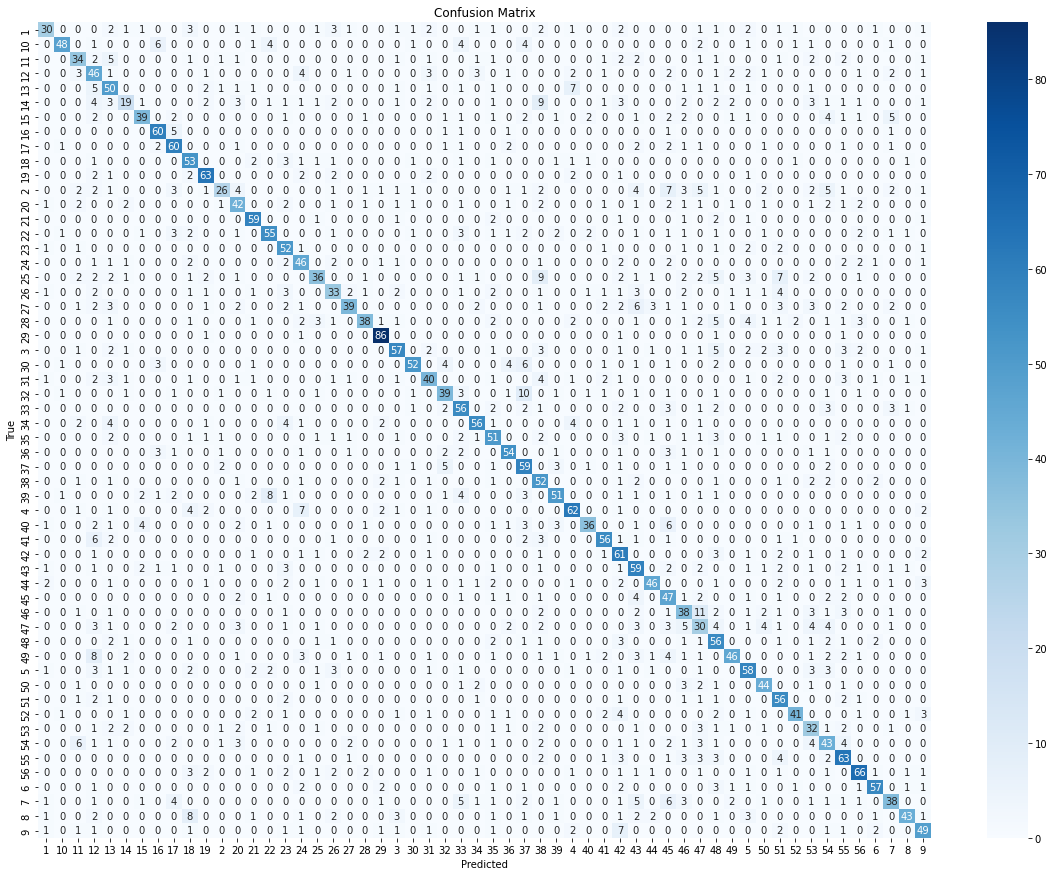

In [24]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Plot confusion matrix with a larger figure size
plt.figure(figsize=(20, 15))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [67]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Get the classes
classes = label_encoder.classes_

# Flatten the confusion matrix
flat_conf_matrix = conf_matrix.flatten()

# Create a list of tuples containing (true_class, predicted_class, count)
confusion_list = [(classes[i // len(classes)], classes[i % len(classes)], flat_conf_matrix[i]) for i in range(len(flat_conf_matrix))]

# Sort the list by count in descending order
sorted_confusion_list = sorted(confusion_list, key=lambda x: x[2], reverse=True)

# Display the top 5 confusion matrix entries
top_5_confusion = sorted_confusion_list[:6]
print("Top 6 Confusion Matrix Entries:")
for entry in top_5_confusion:
    print(f"True: {entry[0]}, Predicted: {entry[1]}, Count: {entry[2]}")


Top 5 Confusion Matrix Entries:
True: 29, Predicted: 29, Count: 86
True: 56, Predicted: 56, Count: 66
True: 19, Predicted: 19, Count: 63
True: 55, Predicted: 55, Count: 63
True: 4, Predicted: 4, Count: 62
True: 42, Predicted: 42, Count: 61


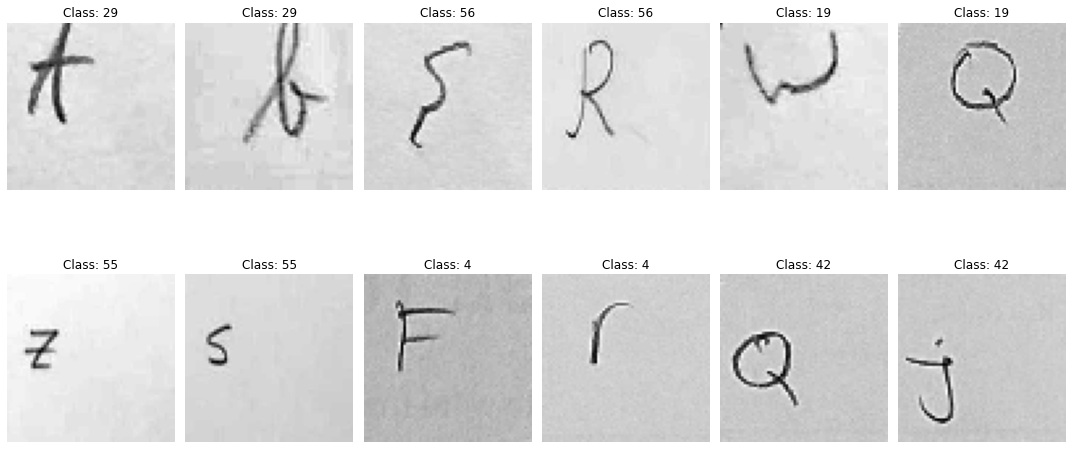

In [76]:
# Define classes for which you want to display photos
selected_classes = [21, 51, 10, 50, 33, 36]

# Set up subplot configuration
num_classes = len(selected_classes)
num_photos_per_class = 2
num_rows = 2
num_columns = num_classes * num_photos_per_class // num_rows

# Display photos for selected classes
plt.figure(figsize=(15, 8))
for i, selected_class in enumerate(selected_classes):
    # Get indices of samples for the selected class
    class_indices = np.where(decoded_true_labels == label_encoder.classes_[selected_class])[0][:num_photos_per_class]

    for j, idx in enumerate(class_indices):
        plt.subplot(num_rows, num_columns, i * num_photos_per_class + j + 1)
        plt.imshow(X_test[idx].reshape(64, 64), cmap='gray')
        plt.title(f'Class: {label_encoder.classes_[selected_class]}')
        plt.axis('off')

plt.tight_layout()
plt.show()


132/132 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step


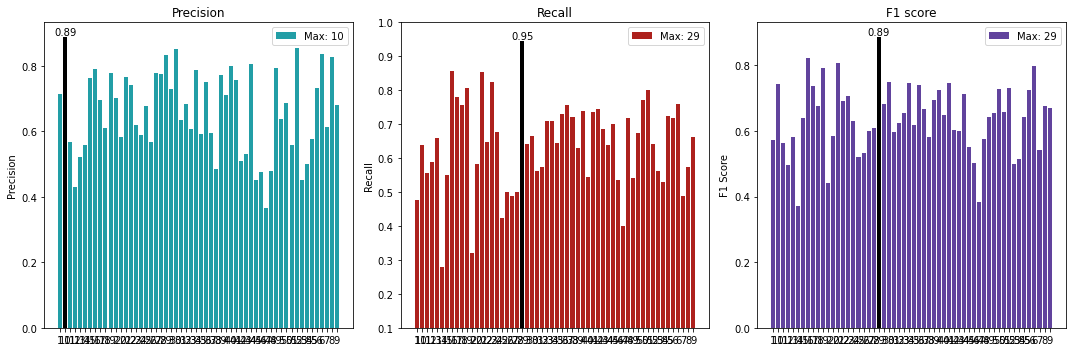

In [17]:
# Use the trained model to predict classes on the test set
predictions = model.predict(X_test)

# Convert the predicted probabilities to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Decode the encoded labels back to the original labels
decoded_true_labels = label_encoder.inverse_transform(y_test)

# Obtain confusion matrix
conf_matrix = confusion_matrix(decoded_true_labels, decoded_predicted_labels, labels=label_encoder.classes_)

# Calculate precision, recall, and F1 score for each class
precision = precision_score(decoded_true_labels, decoded_predicted_labels, average=None)
recall = recall_score(decoded_true_labels, decoded_predicted_labels, average=None)
f1 = f1_score(decoded_true_labels, decoded_predicted_labels, average=None)

# Colors for the bars
precision_color = '#229EA6'
recall_color = '#AD211D'
f1_color = '#61439D'
highlight_color = 'black'

# Find the class with the highest precision, recall, and F1 score
max_precision_class = label_encoder.classes_[np.argmax(precision)]
max_recall_class = label_encoder.classes_[np.argmax(recall)]
max_f1_class = label_encoder.classes_[np.argmax(f1)]

# Plot precision, recall, and F1 score for each class in subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot precision
max_precision_index = np.argmax(precision)
axes[0].bar(label_encoder.classes_, precision, color=precision_color, label=f'Max: {max_precision_class}')
axes[0].bar(label_encoder.classes_[max_precision_index], precision[max_precision_index], color=highlight_color)
axes[0].text(max_precision_index, precision[max_precision_index], f'{precision[max_precision_index]:.2f}', ha='center', va='bottom', color=highlight_color)
axes[0].set_title('Precision')
axes[0].set_ylabel('Precision')
axes[1].set_ylim(0.1, 1.0)
axes[0].legend()

# Plot recall
max_recall_index = np.argmax(recall)
axes[1].bar(label_encoder.classes_, recall, color=recall_color, label=f'Max: {max_recall_class}')
axes[1].bar(label_encoder.classes_[max_recall_index], recall[max_recall_index], color=highlight_color)
axes[1].text(max_recall_index, recall[max_recall_index], f'{recall[max_recall_index]:.2f}', ha='center', va='bottom', color=highlight_color)
axes[1].set_title('Recall')
axes[1].set_ylabel('Recall')
axes[1].set_ylim(0.1, 1.0)
axes[1].legend()

# Plot F1 score
max_f1_index = np.argmax(f1)
axes[2].bar(label_encoder.classes_, f1, color=f1_color, label=f'Max: {max_f1_class}')
axes[2].bar(label_encoder.classes_[max_f1_index], f1[max_f1_index], color=highlight_color)
axes[2].text(max_f1_index, f1[max_f1_index], f'{f1[max_f1_index]:.2f}', ha='center', va='bottom', color=highlight_color)
axes[2].set_title('F1 score')
axes[2].set_ylabel('F1 Score')
axes[1].set_ylim(0.1, 1.0)
axes[2].legend()

plt.tight_layout()
plt.show()


Images for class with highest precision (10):


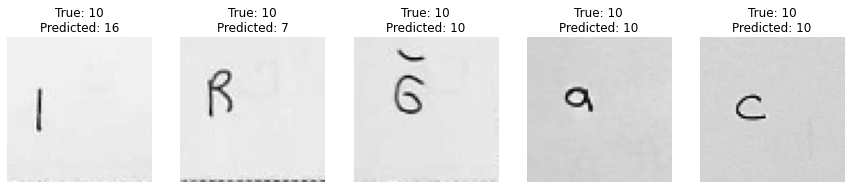

Images for class with highest recall (29):


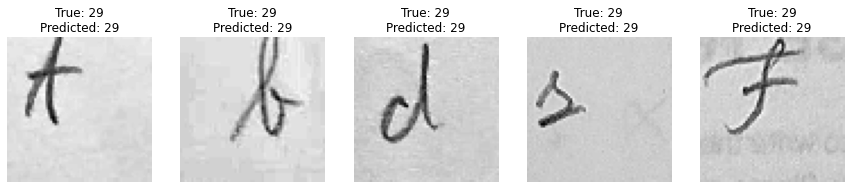

Images for class with highest F1 score (29):


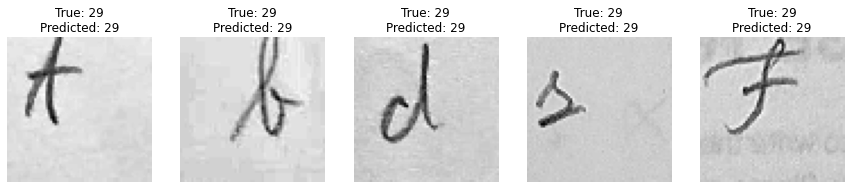

In [22]:
# Find the class with the highest precision, recall, and F1 score
max_precision_class = label_encoder.classes_[np.argmax(precision)]
max_recall_class = label_encoder.classes_[np.argmax(recall)]
max_f1_class = label_encoder.classes_[np.argmax(f1)]

# Get indices of samples for the class with the highest precision, recall, and F1 score
max_precision_indices = np.where(decoded_true_labels == max_precision_class)[0]
max_recall_indices = np.where(decoded_true_labels == max_recall_class)[0]
max_f1_indices = np.where(decoded_true_labels == max_f1_class)[0]

# Display images for the class with the highest precision
print(f"Images for class with highest precision ({max_precision_class}):")
plt.figure(figsize=(15, 3))
for i, idx in enumerate(max_precision_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].reshape(64, 64), cmap='gray')
    plt.title(f'True: {decoded_true_labels[idx]}\nPredicted: {decoded_predicted_labels[idx]}')
    plt.axis('off')
plt.show()

# Display images for the class with the highest recall
print(f"Images for class with highest recall ({max_recall_class}):")
plt.figure(figsize=(15, 3))
for i, idx in enumerate(max_recall_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].reshape(64, 64), cmap='gray')
    plt.title(f'True: {decoded_true_labels[idx]}\nPredicted: {decoded_predicted_labels[idx]}')
    plt.axis('off')
plt.show()

# Display images for the class with the highest F1 score
print(f"Images for class with highest F1 score ({max_f1_class}):")
plt.figure(figsize=(15, 3))
for i, idx in enumerate(max_f1_indices[:5]):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[idx].reshape(64, 64), cmap='gray')
    plt.title(f'True: {decoded_true_labels[idx]}\nPredicted: {decoded_predicted_labels[idx]}')
    plt.axis('off')
plt.show()
